# 연관 분석

In [1]:
import sys

# 사이킷런 ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "association_analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
        
import warnings
warnings.filterwarnings(action='ignore')

## Word2Vec

### 네이버 지식 검색을 이용해서 검색 한 후 단어 추천하기

#### 데이터 가져오기

In [2]:
from bs4 import BeautifulSoup
import urllib
import time
from tqdm import tqdm_notebook

present_candi_text = []

html = 'https://search.naver.com/search.naver?where=kin&sm=tab_jum&ie=utf8&query=' + urllib.parse.quote('문재인') + '&start='
for n in range(1, 1000, 10):
    response = urllib.request.urlopen(html + str(n))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.select('div.question_area > div.question_group > a')
    for line in tmp:
        #print(line.text)
        present_candi_text.append(line.text)
    time.sleep(0.5)
print(present_candi_text)

['문재인 대통령 안보얘기 문재인 대통령이 윤석열 당선인한테 안보얘기 계속 하시는데 문재인도 안보는 별로 아니였나요?', '문재인 대통령 무능하나요?', '원래 문재인 이 이재명 싫어해서 윤석열 이 당선 될줄알았는데 어제보니 문재인 이 뜻이 이재명한테 잇다는것을 알게되엇습니다. 10%이상 이재명이 이긴다고 하네요. 물론 이재명이 되도 문재인 하수아비로 살겟죠. 윤석열 이길 방법 없을까요??', '푸틴이 잘생겼나요 문재인이 잘생겼나요? 저는 개인적으로 문재인이 조금 더 잘생겼다고 생각하는데 제 친구 A도 문재인이 더 잘생겼다고 하는데 제 친구 B는 푸틴이 더 잘생기고 남자답게 생겼다고 하네요 과연 누가 더 잘생겼을까요? 젤렌스키도 추가했으면 좋겠네오', '문재인 부인 사치스러운 옷들 ... 납세자연맹에서 소송을 걸었고, 법원에서 옷 구입 내역을 국민들에게 공개해라고 했음에도 불구하고 왜 문재인 부인은 공개하지 않을까요? 법원 판결을 무시하는거 잘못된거 아닌가요? 떳떳하다면 공개 안할 이유가 없을거 같은데...', '문재인 부동산 정책 문재인 대통령의 부동산 정책의 실패 이유를 정확한 근거를 들어서 설명해 주시면 감사하겠습니다 ex) ~~한 정책 때문에 ~~집값의 상승 효과를 가져왔닻', '문재인대통령 업적이 그리없나요? ... 이말저말 들어보면 한거처럼은 보인다고해요 근데 실상까면 방역망하고 부동산폭등에 경제도박살내고 한게없다고 그러네요 지지자들이나 잘했다하지 다른사람입장 3자입장에서 봤을때는 북한에 돈퍼주고 그밖에 여러가지로 무능한 정부였다네요 문재인대통령이 업적이없는 대통령인가요?', '문재인 마누라 옷이 사비로 샀는지 국민 세금으로 샀는지 그냥 조사하면 안 되나요? 문재인은 왜 조사 거부하죠? 떳떳하면 조사 받으면 되잖아요 닭근혜도 7억인가 사비 쓴 거 조사받았다던데', '문재인 업적이 무엇인가요? 객관적으로 정치색 없이 알려주세요 (정말 궁금해서 그러는겁니다)', '윤석열 문재인 일단 제 개인적인 생각이라는점 알아주세요 윤석열 후보가 "멍청하다" "정치 

#### 형태소 분석

In [3]:
import nltk
from konlpy.tag import Twitter
twitter = Twitter()
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'
tokens_ko = twitter.morphs(present_text)
print(tokens_ko)

['문재인', '대통령', '안보', '얘기', '문재인', '대통령', '이', '윤석열', '당선인', '한테', '안보', '얘기', '계속', '하시는데', '문재인', '도', '안보', '는', '별로', '아니였나요', '?', '\n', '문재인', '대통령', '무능하나요', '?', '\n', '원래', '문재인', '이', '이재명', '싫어해서', '윤석열', '이', '당선', '될줄', '알았는데', '어제', '보니', '문재인', '이', '뜻', '이', '이재명', '한테', '잇다는것을', '알', '게', '되', '엇습', '니', '다', '.', '10%', '이상', '이재명', '이', '이긴다고', '하네요', '.', '물론', '이재명', '이', '되도', '문재인', '하수', '아비', '로', '살겟죠', '.', '윤석열', '이길', '방법', '없을까요', '??', '\n', '푸틴', '이', '잘생겼나요', '문재인', '이', '잘생겼나요', '?', '저', '는', '개인', '적', '으로', '문재인', '이', '조금', '더', '잘생겼다고', '생각', '하는데', '제', '친구', 'A', '도', '문재인', '이', '더', '잘생겼다고', '하는데', '제', '친구', 'B', '는', '푸틴', '이', '더', '잘생기고', '남자답게', '생겼다고', '하네요', '과연', '누가', '더', '잘생겼을까요', '?', '젤', '렌스', '키도', '추가', '했으면', '좋겠', '네오', '\n', '문재인', '부인', '사치스러운', '옷', '들', '...', '납세', '자', '연맹', '에서', '소송', '을', '걸었고', ',', '법원', '에서', '옷', '구입', '내', '역', '을', '국민', '들', '에게', '공개', '해라고', '했음에도', '불구', '하고', '왜', '문재인', '부인', '은', '공개', '하

#### 단어별 등장횟수 확인

In [4]:
ko = nltk.Text(tokens_ko, name='문재인')
print(ko.vocab().most_common(100))

[('문재인', 2200), ('이', 1800), ('?', 1200), ('\n', 1000), ('대통령', 900), ('윤석열', 500), ('도', 500), ('제', 500), ('는', 400), ('이재명', 400), ('적', 400), ('으로', 400), ('더', 400), ('생각', 400), ('조사', 400), ('"', 400), ('안보', 300), ('.', 300), ('로', 300), ('옷', 300), ('들', 300), ('...', 300), ('에서', 300), ('을', 300), ('공개', 300), ('가', 300), ('부동산', 300), ('정책', 300), ('의', 300), ('를', 300), ('한', 300), ('에', 300), ('업적', 300), ('정치', 300), ('얘기', 200), ('한테', 200), ('게', 200), ('다', 200), ('하네요', 200), ('푸틴', 200), ('잘생겼나요', 200), ('저', 200), ('개인', 200), ('잘생겼다고', 200), ('하는데', 200), ('친구', 200), ('부인', 200), ('자', 200), ('법원', 200), ('국민', 200), ('왜', 200), ('은', 200), ('안', 200), ('이유', 200), (')', 200), ('~~', 200), ('말', 200), ('거', 200), ('근데', 200), ('입장', 200), ('인가요', 200), ('사비', 200), ('샀는지', 200), ('후보', 200), ('초보', 200), ('에는', 200), ('당선인', 100), ('계속', 100), ('하시는데', 100), ('별로', 100), ('아니였나요', 100), ('무능하나요', 100), ('원래', 100), ('싫어해서', 100), ('당선', 100), ('될줄', 100), ('알았는데',

#### 불용어 제거

In [5]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
    if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='문재인')
ko.vocab().most_common(50)


[('문재인', 2200),
 ('\n', 1000),
 ('대통령', 900),
 ('윤석열', 500),
 ('이재명', 400),
 ('적', 400),
 ('더', 400),
 ('생각', 400),
 ('조사', 400),
 ('"', 400),
 ('안보', 300),
 ('옷', 300),
 ('에서', 300),
 ('공개', 300),
 ('부동산', 300),
 ('정책', 300),
 ('업적', 300),
 ('정치', 300),
 ('얘기', 200),
 ('한테', 200),
 ('하네요', 200),
 ('푸틴', 200),
 ('잘생겼나요', 200),
 ('저', 200),
 ('개인', 200),
 ('잘생겼다고', 200),
 ('하는데', 200),
 ('친구', 200),
 ('부인', 200),
 ('자', 200),
 ('법원', 200),
 ('국민', 200),
 ('왜', 200),
 ('안', 200),
 ('이유', 200),
 (')', 200),
 ('~~', 200),
 ('말', 200),
 ('근데', 200),
 ('입장', 200),
 ('인가요', 200),
 ('사비', 200),
 ('샀는지', 200),
 ('후보', 200),
 ('초보', 200),
 ('에는', 200),
 ('당선인', 100),
 ('계속', 100),
 ('하시는데', 100),
 ('별로', 100)]

#### 단어 시각화 - 선 그래프

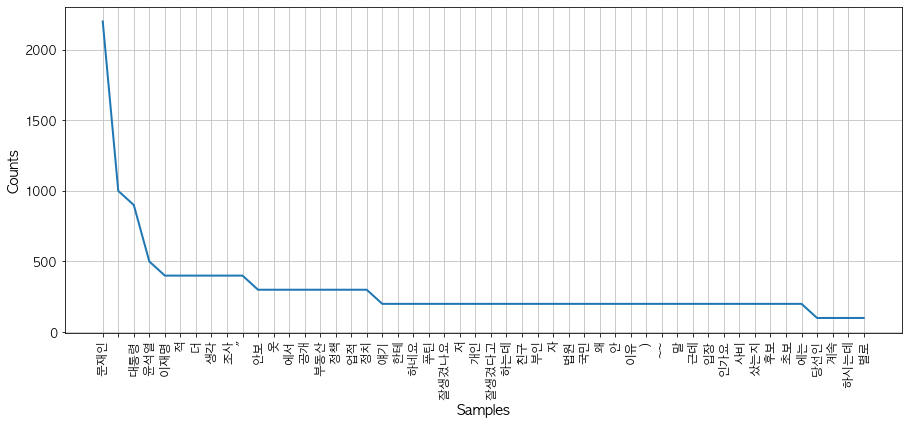

In [6]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

#### 워드 클라우드

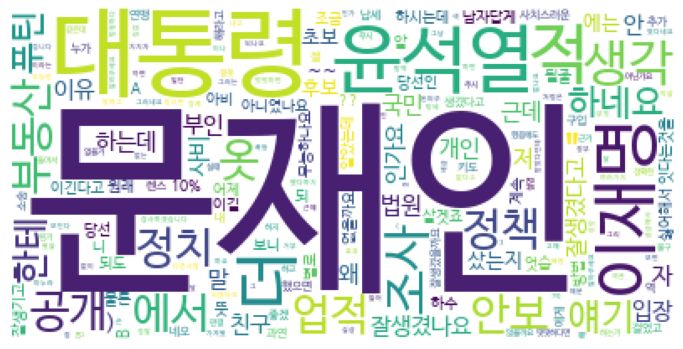

In [7]:
from wordcloud import WordCloud
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='./data/NanumBarunGothic.ttf',
                      relative_scaling = 0.5,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### 단어 추천

In [8]:
!pip install gensim

from gensim.models import word2vec
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r = []

    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])

    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)


문재인 대통령 안보 얘기 문재인 대통령 윤석열 당선인 안보 얘기 계속 하다 문재인 안보 별로 아니다
문재인 대통령 무능하다
원래 문재인 이 이재명 싫어하다 윤석열 이 당선 되다 알다 어제 보다 문재인 이 뜻 이재명 잇다 알 되다 엇습 다 10% 이상 이재명 이기다 하다 물론 이재명 되다 문재인 하수 아비 살다 윤석열 이기다 방법 없다
푸틴 잘생기다 문재인 잘생기다 저 개인 적 문재인 조금 더 잘생기다 생각 하다 제 친구 A 도 문재인 더 잘생기다 하다 제 친구 B 늘다 푸틴 더 잘생기다 남다 생기다 하다 과연 누가 더 잘생기다 젤 렌스 키도 추가 하다 좋다 네오
문재인 부인 사치스럽다 옷 들 납세 자 연맹 소송 걸다 법원 옷 구입 내 역 국민 들 공개 하다 하다 불구 왜 문재인 부인 공개 하다 않다 법원 판결 무시 하다 잘못 된거 아니다 떳떳하다 공개 안 하다 이유 없다 같다
문재인 부동산 정책 문재인 대통령 부동산 정책 실패 이유 정확하다 근거 들어서다 설명 하다 주시 감사하다 ex 하다 정책 때문 집값 상승 효과 가져오다 닻
문재인 대통령 업적 그리다 없다 이 말 저 말 들다 보다 한 거 보이다 고해 근데 실상 끄다 방역 망하다 부동산 폭등 경제 박살 내다 한 게 없다 그렇다 지지자 들 잘 하다 다른사람 입장 3 자 입장 보다 때 북한 돈퍼주 그 여러가지 무능하다 정부 이다 문재인 대통령 업적 없다 대통령
문재인 마누라 옷 사비 사다 국민 세금 사다 그냥 조사 하다 안 되다 문재인 왜 조사 거부 하다 떳떳하다 조사 받다 되다 닭 근혜 7억 인가 사비 쓸다 거 조사 받다
문재인 업적 무엇 객관 적 정치 색 없이 알다 정말 궁금하다 그렇다 겁니다
윤석열 문재인 일단 제 개인 적 생각 점 알아주다 윤석열 후보 멍청하다 정치 초보 하다 근데 제 생각 문재인 현 대통령 정치 초보 아니다 제 생각 문재인 대통령 윤 후보 다르다 바 없다 같다 중립 적 답변 해주다 바라다
문재인 대통령 안보 얘기 문재인 대통령 윤석열 당선인 안보 얘기 계속 하다 문재인 안보 별로 아니다

문재인 업적 무엇 객관 적 정치 색 없이 알다 정말 궁금하다 그렇다 겁니다
윤석열 문재인 일단 제 개인 적 생각 점 알아주다 윤석열 후보 멍청하다 정치 초보 하다 근데 제 생각 문재인 현 대통령 정치 초보 아니다 제 생각 문재인 대통령 윤 후보 다르다 바 없다 같다 중립 적 답변 해주다 바라다
문재인 대통령 안보 얘기 문재인 대통령 윤석열 당선인 안보 얘기 계속 하다 문재인 안보 별로 아니다
문재인 대통령 무능하다
원래 문재인 이 이재명 싫어하다 윤석열 이 당선 되다 알다 어제 보다 문재인 이 뜻 이재명 잇다 알 되다 엇습 다 10% 이상 이재명 이기다 하다 물론 이재명 되다 문재인 하수 아비 살다 윤석열 이기다 방법 없다
푸틴 잘생기다 문재인 잘생기다 저 개인 적 문재인 조금 더 잘생기다 생각 하다 제 친구 A 도 문재인 더 잘생기다 하다 제 친구 B 늘다 푸틴 더 잘생기다 남다 생기다 하다 과연 누가 더 잘생기다 젤 렌스 키도 추가 하다 좋다 네오
문재인 부인 사치스럽다 옷 들 납세 자 연맹 소송 걸다 법원 옷 구입 내 역 국민 들 공개 하다 하다 불구 왜 문재인 부인 공개 하다 않다 법원 판결 무시 하다 잘못 된거 아니다 떳떳하다 공개 안 하다 이유 없다 같다
문재인 부동산 정책 문재인 대통령 부동산 정책 실패 이유 정확하다 근거 들어서다 설명 하다 주시 감사하다 ex 하다 정책 때문 집값 상승 효과 가져오다 닻
문재인 대통령 업적 그리다 없다 이 말 저 말 들다 보다 한 거 보이다 고해 근데 실상 끄다 방역 망하다 부동산 폭등 경제 박살 내다 한 게 없다 그렇다 지지자 들 잘 하다 다른사람 입장 3 자 입장 보다 때 북한 돈퍼주 그 여러가지 무능하다 정부 이다 문재인 대통령 업적 없다 대통령
문재인 마누라 옷 사비 사다 국민 세금 사다 그냥 조사 하다 안 되다 문재인 왜 조사 거부 하다 떳떳하다 조사 받다 되다 닭 근혜 7억 인가 사비 쓸다 거 조사 받다
문재인 업적 무엇 객관 적 정치 색 없이 알다 정말 궁금하다 그렇다 겁니다
윤석열 문재인 일단 제 

문재인 대통령 업적 그리다 없다 이 말 저 말 들다 보다 한 거 보이다 고해 근데 실상 끄다 방역 망하다 부동산 폭등 경제 박살 내다 한 게 없다 그렇다 지지자 들 잘 하다 다른사람 입장 3 자 입장 보다 때 북한 돈퍼주 그 여러가지 무능하다 정부 이다 문재인 대통령 업적 없다 대통령
문재인 마누라 옷 사비 사다 국민 세금 사다 그냥 조사 하다 안 되다 문재인 왜 조사 거부 하다 떳떳하다 조사 받다 되다 닭 근혜 7억 인가 사비 쓸다 거 조사 받다
문재인 업적 무엇 객관 적 정치 색 없이 알다 정말 궁금하다 그렇다 겁니다
윤석열 문재인 일단 제 개인 적 생각 점 알아주다 윤석열 후보 멍청하다 정치 초보 하다 근데 제 생각 문재인 현 대통령 정치 초보 아니다 제 생각 문재인 대통령 윤 후보 다르다 바 없다 같다 중립 적 답변 해주다 바라다
문재인 대통령 안보 얘기 문재인 대통령 윤석열 당선인 안보 얘기 계속 하다 문재인 안보 별로 아니다
문재인 대통령 무능하다
원래 문재인 이 이재명 싫어하다 윤석열 이 당선 되다 알다 어제 보다 문재인 이 뜻 이재명 잇다 알 되다 엇습 다 10% 이상 이재명 이기다 하다 물론 이재명 되다 문재인 하수 아비 살다 윤석열 이기다 방법 없다
푸틴 잘생기다 문재인 잘생기다 저 개인 적 문재인 조금 더 잘생기다 생각 하다 제 친구 A 도 문재인 더 잘생기다 하다 제 친구 B 늘다 푸틴 더 잘생기다 남다 생기다 하다 과연 누가 더 잘생기다 젤 렌스 키도 추가 하다 좋다 네오
문재인 부인 사치스럽다 옷 들 납세 자 연맹 소송 걸다 법원 옷 구입 내 역 국민 들 공개 하다 하다 불구 왜 문재인 부인 공개 하다 않다 법원 판결 무시 하다 잘못 된거 아니다 떳떳하다 공개 안 하다 이유 없다 같다
문재인 부동산 정책 문재인 대통령 부동산 정책 실패 이유 정확하다 근거 들어서다 설명 하다 주시 감사하다 ex 하다 정책 때문 집값 상승 효과 가져오다 닻
문재인 대통령 업적 그리다 없다 이 말 저 말 들다 보다 한 거 보이다 고해 근데 실상 끄다 방역 

문재인 대통령 업적 그리다 없다 이 말 저 말 들다 보다 한 거 보이다 고해 근데 실상 끄다 방역 망하다 부동산 폭등 경제 박살 내다 한 게 없다 그렇다 지지자 들 잘 하다 다른사람 입장 3 자 입장 보다 때 북한 돈퍼주 그 여러가지 무능하다 정부 이다 문재인 대통령 업적 없다 대통령
문재인 마누라 옷 사비 사다 국민 세금 사다 그냥 조사 하다 안 되다 문재인 왜 조사 거부 하다 떳떳하다 조사 받다 되다 닭 근혜 7억 인가 사비 쓸다 거 조사 받다
문재인 업적 무엇 객관 적 정치 색 없이 알다 정말 궁금하다 그렇다 겁니다
윤석열 문재인 일단 제 개인 적 생각 점 알아주다 윤석열 후보 멍청하다 정치 초보 하다 근데 제 생각 문재인 현 대통령 정치 초보 아니다 제 생각 문재인 대통령 윤 후보 다르다 바 없다 같다 중립 적 답변 해주다 바라다
문재인 대통령 안보 얘기 문재인 대통령 윤석열 당선인 안보 얘기 계속 하다 문재인 안보 별로 아니다
문재인 대통령 무능하다
원래 문재인 이 이재명 싫어하다 윤석열 이 당선 되다 알다 어제 보다 문재인 이 뜻 이재명 잇다 알 되다 엇습 다 10% 이상 이재명 이기다 하다 물론 이재명 되다 문재인 하수 아비 살다 윤석열 이기다 방법 없다
푸틴 잘생기다 문재인 잘생기다 저 개인 적 문재인 조금 더 잘생기다 생각 하다 제 친구 A 도 문재인 더 잘생기다 하다 제 친구 B 늘다 푸틴 더 잘생기다 남다 생기다 하다 과연 누가 더 잘생기다 젤 렌스 키도 추가 하다 좋다 네오
문재인 부인 사치스럽다 옷 들 납세 자 연맹 소송 걸다 법원 옷 구입 내 역 국민 들 공개 하다 하다 불구 왜 문재인 부인 공개 하다 않다 법원 판결 무시 하다 잘못 된거 아니다 떳떳하다 공개 안 하다 이유 없다 같다
문재인 부동산 정책 문재인 대통령 부동산 정책 실패 이유 정확하다 근거 들어서다 설명 하다 주시 감사하다 ex 하다 정책 때문 집값 상승 효과 가져오다 닻
문재인 대통령 업적 그리다 없다 이 말 저 말 들다 보다 한 거 보이다 고해 근데 실상 끄다 방역 

윤석열 문재인 일단 제 개인 적 생각 점 알아주다 윤석열 후보 멍청하다 정치 초보 하다 근데 제 생각 문재인 현 대통령 정치 초보 아니다 제 생각 문재인 대통령 윤 후보 다르다 바 없다 같다 중립 적 답변 해주다 바라다
문재인 대통령 안보 얘기 문재인 대통령 윤석열 당선인 안보 얘기 계속 하다 문재인 안보 별로 아니다
문재인 대통령 무능하다
원래 문재인 이 이재명 싫어하다 윤석열 이 당선 되다 알다 어제 보다 문재인 이 뜻 이재명 잇다 알 되다 엇습 다 10% 이상 이재명 이기다 하다 물론 이재명 되다 문재인 하수 아비 살다 윤석열 이기다 방법 없다
푸틴 잘생기다 문재인 잘생기다 저 개인 적 문재인 조금 더 잘생기다 생각 하다 제 친구 A 도 문재인 더 잘생기다 하다 제 친구 B 늘다 푸틴 더 잘생기다 남다 생기다 하다 과연 누가 더 잘생기다 젤 렌스 키도 추가 하다 좋다 네오
문재인 부인 사치스럽다 옷 들 납세 자 연맹 소송 걸다 법원 옷 구입 내 역 국민 들 공개 하다 하다 불구 왜 문재인 부인 공개 하다 않다 법원 판결 무시 하다 잘못 된거 아니다 떳떳하다 공개 안 하다 이유 없다 같다
문재인 부동산 정책 문재인 대통령 부동산 정책 실패 이유 정확하다 근거 들어서다 설명 하다 주시 감사하다 ex 하다 정책 때문 집값 상승 효과 가져오다 닻
문재인 대통령 업적 그리다 없다 이 말 저 말 들다 보다 한 거 보이다 고해 근데 실상 끄다 방역 망하다 부동산 폭등 경제 박살 내다 한 게 없다 그렇다 지지자 들 잘 하다 다른사람 입장 3 자 입장 보다 때 북한 돈퍼주 그 여러가지 무능하다 정부 이다 문재인 대통령 업적 없다 대통령
문재인 마누라 옷 사비 사다 국민 세금 사다 그냥 조사 하다 안 되다 문재인 왜 조사 거부 하다 떳떳하다 조사 받다 되다 닭 근혜 7억 인가 사비 쓸다 거 조사 받다
문재인 업적 무엇 객관 적 정치 색 없이 알다 정말 궁금하다 그렇다 겁니다
윤석열 문재인 일단 제 개인 적 생각 점 알아주다 윤석열 후보 멍청하다 정치 초보 하다 근데 제 생

푸틴 잘생기다 문재인 잘생기다 저 개인 적 문재인 조금 더 잘생기다 생각 하다 제 친구 A 도 문재인 더 잘생기다 하다 제 친구 B 늘다 푸틴 더 잘생기다 남다 생기다 하다 과연 누가 더 잘생기다 젤 렌스 키도 추가 하다 좋다 네오
문재인 부인 사치스럽다 옷 들 납세 자 연맹 소송 걸다 법원 옷 구입 내 역 국민 들 공개 하다 하다 불구 왜 문재인 부인 공개 하다 않다 법원 판결 무시 하다 잘못 된거 아니다 떳떳하다 공개 안 하다 이유 없다 같다
문재인 부동산 정책 문재인 대통령 부동산 정책 실패 이유 정확하다 근거 들어서다 설명 하다 주시 감사하다 ex 하다 정책 때문 집값 상승 효과 가져오다 닻
문재인 대통령 업적 그리다 없다 이 말 저 말 들다 보다 한 거 보이다 고해 근데 실상 끄다 방역 망하다 부동산 폭등 경제 박살 내다 한 게 없다 그렇다 지지자 들 잘 하다 다른사람 입장 3 자 입장 보다 때 북한 돈퍼주 그 여러가지 무능하다 정부 이다 문재인 대통령 업적 없다 대통령
문재인 마누라 옷 사비 사다 국민 세금 사다 그냥 조사 하다 안 되다 문재인 왜 조사 거부 하다 떳떳하다 조사 받다 되다 닭 근혜 7억 인가 사비 쓸다 거 조사 받다
문재인 업적 무엇 객관 적 정치 색 없이 알다 정말 궁금하다 그렇다 겁니다
윤석열 문재인 일단 제 개인 적 생각 점 알아주다 윤석열 후보 멍청하다 정치 초보 하다 근데 제 생각 문재인 현 대통령 정치 초보 아니다 제 생각 문재인 대통령 윤 후보 다르다 바 없다 같다 중립 적 답변 해주다 바라다
문재인 대통령 안보 얘기 문재인 대통령 윤석열 당선인 안보 얘기 계속 하다 문재인 안보 별로 아니다
문재인 대통령 무능하다
원래 문재인 이 이재명 싫어하다 윤석열 이 당선 되다 알다 어제 보다 문재인 이 뜻 이재명 잇다 알 되다 엇습 다 10% 이상 이재명 이기다 하다 물론 이재명 되다 문재인 하수 아비 살다 윤석열 이기다 방법 없다
푸틴 잘생기다 문재인 잘생기다 저 개인 적 문재인 조금 더 잘생기다 생각 하다 제 친구 A 도 문재

문재인 부인 사치스럽다 옷 들 납세 자 연맹 소송 걸다 법원 옷 구입 내 역 국민 들 공개 하다 하다 불구 왜 문재인 부인 공개 하다 않다 법원 판결 무시 하다 잘못 된거 아니다 떳떳하다 공개 안 하다 이유 없다 같다
문재인 부동산 정책 문재인 대통령 부동산 정책 실패 이유 정확하다 근거 들어서다 설명 하다 주시 감사하다 ex 하다 정책 때문 집값 상승 효과 가져오다 닻
문재인 대통령 업적 그리다 없다 이 말 저 말 들다 보다 한 거 보이다 고해 근데 실상 끄다 방역 망하다 부동산 폭등 경제 박살 내다 한 게 없다 그렇다 지지자 들 잘 하다 다른사람 입장 3 자 입장 보다 때 북한 돈퍼주 그 여러가지 무능하다 정부 이다 문재인 대통령 업적 없다 대통령
문재인 마누라 옷 사비 사다 국민 세금 사다 그냥 조사 하다 안 되다 문재인 왜 조사 거부 하다 떳떳하다 조사 받다 되다 닭 근혜 7억 인가 사비 쓸다 거 조사 받다
문재인 업적 무엇 객관 적 정치 색 없이 알다 정말 궁금하다 그렇다 겁니다
윤석열 문재인 일단 제 개인 적 생각 점 알아주다 윤석열 후보 멍청하다 정치 초보 하다 근데 제 생각 문재인 현 대통령 정치 초보 아니다 제 생각 문재인 대통령 윤 후보 다르다 바 없다 같다 중립 적 답변 해주다 바라다
문재인 대통령 안보 얘기 문재인 대통령 윤석열 당선인 안보 얘기 계속 하다 문재인 안보 별로 아니다
문재인 대통령 무능하다
원래 문재인 이 이재명 싫어하다 윤석열 이 당선 되다 알다 어제 보다 문재인 이 뜻 이재명 잇다 알 되다 엇습 다 10% 이상 이재명 이기다 하다 물론 이재명 되다 문재인 하수 아비 살다 윤석열 이기다 방법 없다
푸틴 잘생기다 문재인 잘생기다 저 개인 적 문재인 조금 더 잘생기다 생각 하다 제 친구 A 도 문재인 더 잘생기다 하다 제 친구 B 늘다 푸틴 더 잘생기다 남다 생기다 하다 과연 누가 더 잘생기다 젤 렌스 키도 추가 하다 좋다 네오
문재인 부인 사치스럽다 옷 들 납세 자 연맹 소송 걸다 법원 옷 구입 내 역 국민 들 공개 하다 하

문재인 대통령 업적 그리다 없다 이 말 저 말 들다 보다 한 거 보이다 고해 근데 실상 끄다 방역 망하다 부동산 폭등 경제 박살 내다 한 게 없다 그렇다 지지자 들 잘 하다 다른사람 입장 3 자 입장 보다 때 북한 돈퍼주 그 여러가지 무능하다 정부 이다 문재인 대통령 업적 없다 대통령
문재인 마누라 옷 사비 사다 국민 세금 사다 그냥 조사 하다 안 되다 문재인 왜 조사 거부 하다 떳떳하다 조사 받다 되다 닭 근혜 7억 인가 사비 쓸다 거 조사 받다
문재인 업적 무엇 객관 적 정치 색 없이 알다 정말 궁금하다 그렇다 겁니다
윤석열 문재인 일단 제 개인 적 생각 점 알아주다 윤석열 후보 멍청하다 정치 초보 하다 근데 제 생각 문재인 현 대통령 정치 초보 아니다 제 생각 문재인 대통령 윤 후보 다르다 바 없다 같다 중립 적 답변 해주다 바라다
문재인 대통령 안보 얘기 문재인 대통령 윤석열 당선인 안보 얘기 계속 하다 문재인 안보 별로 아니다
문재인 대통령 무능하다
원래 문재인 이 이재명 싫어하다 윤석열 이 당선 되다 알다 어제 보다 문재인 이 뜻 이재명 잇다 알 되다 엇습 다 10% 이상 이재명 이기다 하다 물론 이재명 되다 문재인 하수 아비 살다 윤석열 이기다 방법 없다
푸틴 잘생기다 문재인 잘생기다 저 개인 적 문재인 조금 더 잘생기다 생각 하다 제 친구 A 도 문재인 더 잘생기다 하다 제 친구 B 늘다 푸틴 더 잘생기다 남다 생기다 하다 과연 누가 더 잘생기다 젤 렌스 키도 추가 하다 좋다 네오
문재인 부인 사치스럽다 옷 들 납세 자 연맹 소송 걸다 법원 옷 구입 내 역 국민 들 공개 하다 하다 불구 왜 문재인 부인 공개 하다 않다 법원 판결 무시 하다 잘못 된거 아니다 떳떳하다 공개 안 하다 이유 없다 같다
문재인 부동산 정책 문재인 대통령 부동산 정책 실패 이유 정확하다 근거 들어서다 설명 하다 주시 감사하다 ex 하다 정책 때문 집값 상승 효과 가져오다 닻
문재인 대통령 업적 그리다 없다 이 말 저 말 들다 보다 한 거 보이다 고해 근데 실상 끄다 방역 

문재인 업적 무엇 객관 적 정치 색 없이 알다 정말 궁금하다 그렇다 겁니다
윤석열 문재인 일단 제 개인 적 생각 점 알아주다 윤석열 후보 멍청하다 정치 초보 하다 근데 제 생각 문재인 현 대통령 정치 초보 아니다 제 생각 문재인 대통령 윤 후보 다르다 바 없다 같다 중립 적 답변 해주다 바라다
문재인 대통령 안보 얘기 문재인 대통령 윤석열 당선인 안보 얘기 계속 하다 문재인 안보 별로 아니다
문재인 대통령 무능하다
원래 문재인 이 이재명 싫어하다 윤석열 이 당선 되다 알다 어제 보다 문재인 이 뜻 이재명 잇다 알 되다 엇습 다 10% 이상 이재명 이기다 하다 물론 이재명 되다 문재인 하수 아비 살다 윤석열 이기다 방법 없다
푸틴 잘생기다 문재인 잘생기다 저 개인 적 문재인 조금 더 잘생기다 생각 하다 제 친구 A 도 문재인 더 잘생기다 하다 제 친구 B 늘다 푸틴 더 잘생기다 남다 생기다 하다 과연 누가 더 잘생기다 젤 렌스 키도 추가 하다 좋다 네오
문재인 부인 사치스럽다 옷 들 납세 자 연맹 소송 걸다 법원 옷 구입 내 역 국민 들 공개 하다 하다 불구 왜 문재인 부인 공개 하다 않다 법원 판결 무시 하다 잘못 된거 아니다 떳떳하다 공개 안 하다 이유 없다 같다
문재인 부동산 정책 문재인 대통령 부동산 정책 실패 이유 정확하다 근거 들어서다 설명 하다 주시 감사하다 ex 하다 정책 때문 집값 상승 효과 가져오다 닻
문재인 대통령 업적 그리다 없다 이 말 저 말 들다 보다 한 거 보이다 고해 근데 실상 끄다 방역 망하다 부동산 폭등 경제 박살 내다 한 게 없다 그렇다 지지자 들 잘 하다 다른사람 입장 3 자 입장 보다 때 북한 돈퍼주 그 여러가지 무능하다 정부 이다 문재인 대통령 업적 없다 대통령
문재인 마누라 옷 사비 사다 국민 세금 사다 그냥 조사 하다 안 되다 문재인 왜 조사 거부 하다 떳떳하다 조사 받다 되다 닭 근혜 7억 인가 사비 쓸다 거 조사 받다
문재인 업적 무엇 객관 적 정치 색 없이 알다 정말 궁금하다 그렇다 겁니다
윤석열 문재인 일단 제 

문재인 대통령 안보 얘기 문재인 대통령 윤석열 당선인 안보 얘기 계속 하다 문재인 안보 별로 아니다
문재인 대통령 무능하다
원래 문재인 이 이재명 싫어하다 윤석열 이 당선 되다 알다 어제 보다 문재인 이 뜻 이재명 잇다 알 되다 엇습 다 10% 이상 이재명 이기다 하다 물론 이재명 되다 문재인 하수 아비 살다 윤석열 이기다 방법 없다
푸틴 잘생기다 문재인 잘생기다 저 개인 적 문재인 조금 더 잘생기다 생각 하다 제 친구 A 도 문재인 더 잘생기다 하다 제 친구 B 늘다 푸틴 더 잘생기다 남다 생기다 하다 과연 누가 더 잘생기다 젤 렌스 키도 추가 하다 좋다 네오
문재인 부인 사치스럽다 옷 들 납세 자 연맹 소송 걸다 법원 옷 구입 내 역 국민 들 공개 하다 하다 불구 왜 문재인 부인 공개 하다 않다 법원 판결 무시 하다 잘못 된거 아니다 떳떳하다 공개 안 하다 이유 없다 같다
문재인 부동산 정책 문재인 대통령 부동산 정책 실패 이유 정확하다 근거 들어서다 설명 하다 주시 감사하다 ex 하다 정책 때문 집값 상승 효과 가져오다 닻
문재인 대통령 업적 그리다 없다 이 말 저 말 들다 보다 한 거 보이다 고해 근데 실상 끄다 방역 망하다 부동산 폭등 경제 박살 내다 한 게 없다 그렇다 지지자 들 잘 하다 다른사람 입장 3 자 입장 보다 때 북한 돈퍼주 그 여러가지 무능하다 정부 이다 문재인 대통령 업적 없다 대통령
문재인 마누라 옷 사비 사다 국민 세금 사다 그냥 조사 하다 안 되다 문재인 왜 조사 거부 하다 떳떳하다 조사 받다 되다 닭 근혜 7억 인가 사비 쓸다 거 조사 받다
문재인 업적 무엇 객관 적 정치 색 없이 알다 정말 궁금하다 그렇다 겁니다
윤석열 문재인 일단 제 개인 적 생각 점 알아주다 윤석열 후보 멍청하다 정치 초보 하다 근데 제 생각 문재인 현 대통령 정치 초보 아니다 제 생각 문재인 대통령 윤 후보 다르다 바 없다 같다 중립 적 답변 해주다 바라다
문재인 대통령 안보 얘기 문재인 대통령 윤석열 당선인 안보 얘기 계속 하다 문재인 안보 별로 아니다

In [9]:
data_file = 'moon.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))
    data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, vector_size=200, window=10, hs=1,min_count=2, sg=1)
model.save('moon.model')
model = word2vec.Word2Vec.load("moon.model")
model.wv.most_similar(positive=['문재인'])

[('윤석열', 0.4807571470737457),
 ('되다', 0.36410200595855713),
 ('개인', 0.35733890533447266),
 ('얘기', 0.33162808418273926),
 ('잇다', 0.3306303024291992),
 ('알', 0.32898440957069397),
 ('엇습', 0.31637537479400635),
 ('당선인', 0.31560084223747253),
 ('10%', 0.31510257720947266),
 ('안보', 0.31092795729637146)]

In [10]:
model.wv.most_similar(positive=['윤석열'])

[('이재명', 0.6229581832885742),
 ('10%', 0.5748108625411987),
 ('아니다', 0.5656801462173462),
 ('알', 0.5563425421714783),
 ('알아주다', 0.5542044639587402),
 ('엇습', 0.5504810214042664),
 ('잇다', 0.5409107208251953),
 ('이상', 0.540590226650238),
 ('다', 0.5342009663581848),
 ('점', 0.5147002935409546)]

### 손흥민 연관 분석

##### 데이터 읽어오기

In [11]:
df = pd.read_csv("./data/tweet_temp.csv")
df.head()

,created,tweet_text
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기..."
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...


#### 한글 이외의 문자 제거

In [12]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [13]:
# ‘tweet_text’ 피처에 이를 적용합니다.
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...,
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...",트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처 한국경제 네이버 뉴스
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf,귀여워 손흥민
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...,경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...


In [14]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전 예시 파일 - https://www.ranks.nl/stopwords/korean
korean_stopwords_path = "./data/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [15]:
# ‘ko_text’ 피처에 이를 적용합니다.
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(525, 4)


,created,tweet_text,ko_text,nouns
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...,,[]
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...",트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처 한국경제 네이버 뉴스,"[트릴, 리온, 축구, 국가대표, 손흥민, 선수, 샴푸, 모델, 기용, 출처, 한국..."
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...,"[손흥민, 말씀]"
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf,귀여워 손흥민,[손흥민]
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...,경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...,"[경남, 도민, 일보, 프로축구, 연맹, 경기장, 선거운동, 손흥민, 영국, 관중,..."


In [16]:
!pip install apyori

from apyori import apriori

# 장바구니 형태의 데이터(트랜잭션 데이터)를 생성
transactions = [
    ['손흥민', '시소코'],
    ['손흥민', '케인'],
    ['손흥민', '케인', '포체티노']
]

# 연관 분석을 수행
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'포체티노'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'포체티노'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'시소코', '손흥민'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코', '손흥민'}), confidence=0.3333333333333333, lift=1.0), Or

In [17]:
# 지지도 0.5, 신뢰도 0.6, 향상도 1.0 이상이면서 (손흥민, 케인) 처럼 규칙의 크기가 2 이하인 규칙을 추출
list(apriori(transactions,
             min_support=0.5,
             min_confidence=0.6,
             min_lift=1.0,
             max_length=2))

[RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'손흥민', '케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])]

In [18]:
# 트랜잭션 데이터를 추출합니다.
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.
print(transactions)

[['트릴', '리온', '축구', '국가대표', '손흥민', '선수', '샴푸', '모델', '기용', '출처', '한국', '경제', '네이버', '뉴스'], ['손흥민', '말씀'], ['손흥민'], ['경남', '도민', '일보', '프로축구', '연맹', '경기장', '선거운동', '손흥민', '영국', '관중', '인종차별', '행위', '보고', '축구장', '선거운동', '규정', '위반', '이야기'], ['선택', '손흥민', '축구'], ['토트넘', '골수팬', '승부사', '제일', '선수', '손흥민', '입다'], ['계정', '지기', '실수', '삭제', '다시', '하리보', '손흥민', '홍보', '모델', '발탁', '기념', '해당', '추첨', '통해', '하리보', '골드바', '기간'], ['안녕하십니까', '손흥민', '트위터', '매우', '오늘', '경기도', '관심'], ['계정', '지기', '실수', '삭제', '다시', '하리보', '손흥민', '홍보', '모델', '발탁', '기념', '해당', '추첨', '통해', '하리보', '골드바', '기간'], ['출국', '손흥민'], ['출국', '손흥민'], ['한국', '축구', '국가대표팀', '조현우', '손흥민', '황의조', '선수', '아시아', '게임', '금메달', '조현우', '손흥민', '황의조', '금메달', '모습', '의조', '진짜'], ['한국', '축구', '국가대표팀', '조현우', '손흥민', '황의조', '선수', '아시아', '게임', '금메달', '조현우', '손흥민', '황의조', '금메달', '모습', '의조', '진짜'], ['긴급', '속보', '하리보', '신제품', '손흥민', '개시', '하리보', '신제품', '샤인', '가장', '먼저', '보고', '팔로우', '알림', '설정', '두기', '하리보', '신제품'], ['트릴', '리온', '축구', '국가대표', '손흥민', '선수', '샴푸', '

In [19]:
# 연관 분석을 수행
results = list(apriori(transactions,
                       min_support=0.1,
                       min_confidence=0.2,
                       min_lift=5,
                       max_length=2))
print(results)

[RelationRecord(items=frozenset({'국가대표팀', '게임'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'국가대표팀'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'국가대표팀'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)]), RelationRecord(items=frozenset({'금메달', '게임'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'금메달'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'금메달'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)]), RelationRecord(items=frozenset({'모습', '게임'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'모습'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'모습'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)]), RelationRecord(items=frozenset({'아시아', '게임'}), support=0.14285714285714285, or

In [20]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,국가대표팀,게임,0.142857
1,금메달,게임,0.142857
2,모습,게임,0.142857
3,아시아,게임,0.142857
4,게임,의조,0.142857


#### 키워드 빈도 추출

In [21]:
# 말뭉치를 추출
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)

             트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 귀여워 손흥민   경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 관중이 인종차별 행위를 한 것과 같은 급으로 보고 있다 그만큼 축구장 내 선거운동 규정 위반이 엄격하다는 이야기인데요 내가 선택을 받지 않았더라면 손흥민보다 축구를 잘했었을까안녕하세요 토트넘 골수팬 렙 승부사입니다 제일 좋아하는 선수는 손흥민입다   계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간  안녕하십니까 손흥민입니다 오랜만에 트위터에 들어오니 매우 어색하네요오늘 경기도 많은 관심 부탁드립니다  계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간   출국손흥민    출국손흥민   한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요 한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요    긴급속보 하리보 신제품이 나온다고 손흥민 이 개시하는 하리보 신제품 썬샤인을 가장 먼저 받아보고 싶다면 팔로우 하고 알림 설정까지 해두기하리보 신제품              트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋ

In [22]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'손흥민': 560, '하리보': 245, '축구': 140, '선수': 140, '조현우': 140, '황의조': 140, '금메달': 140, '모델': 105, '한국': 105, '신제품': 105, '선거운동': 70, '보고': 70, '계정': 70, '지기': 70, '실수': 70, '삭제': 70, '다시': 70, '홍보': 70, '발탁': 70, '기념': 70, '해당': 70, '추첨': 70, '통해': 70, '골드바': 70, '기간': 70, '출국': 70, '국가대표팀': 70, '아시아': 70, '게임': 70, '모습': 70, '의조': 70, '진짜': 70, '트릴': 35, '리온': 35, '국가대표': 35, '샴푸': 35, '기용': 35, '출처': 35, '경제': 35, '네이버': 35, '뉴스': 35, '말씀': 35, '경남': 35, '도민': 35, '일보': 35, '프로축구': 35, '연맹': 35, '경기장': 35, '영국': 35, '관중': 35, '인종차별': 35, '행위': 35, '축구장': 35, '규정': 35, '위반': 35, '이야기': 35, '선택': 35, '토트넘': 35, '골수팬': 35, '승부사': 35, '제일': 35, '입다': 35, '안녕하십니까': 35, '트위터': 35, '매우': 35, '오늘': 35, '경기도': 35, '관심': 35, '긴급': 35, '속보': 35, '개시': 35, '샤인': 35, '가장': 35, '먼저': 35, '팔로우': 35, '알림': 35, '설정': 35, '두기': 35})


In [23]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50] # 시각화의 편의를 위해 ‘nodesize’ 50 이하는 제거합니다.
node_df.head()

,node,nodesize
2,축구,140
4,손흥민,560
5,선수,140
7,모델,105
10,한국,105


#### 연관 키워드 네트워크 시각화

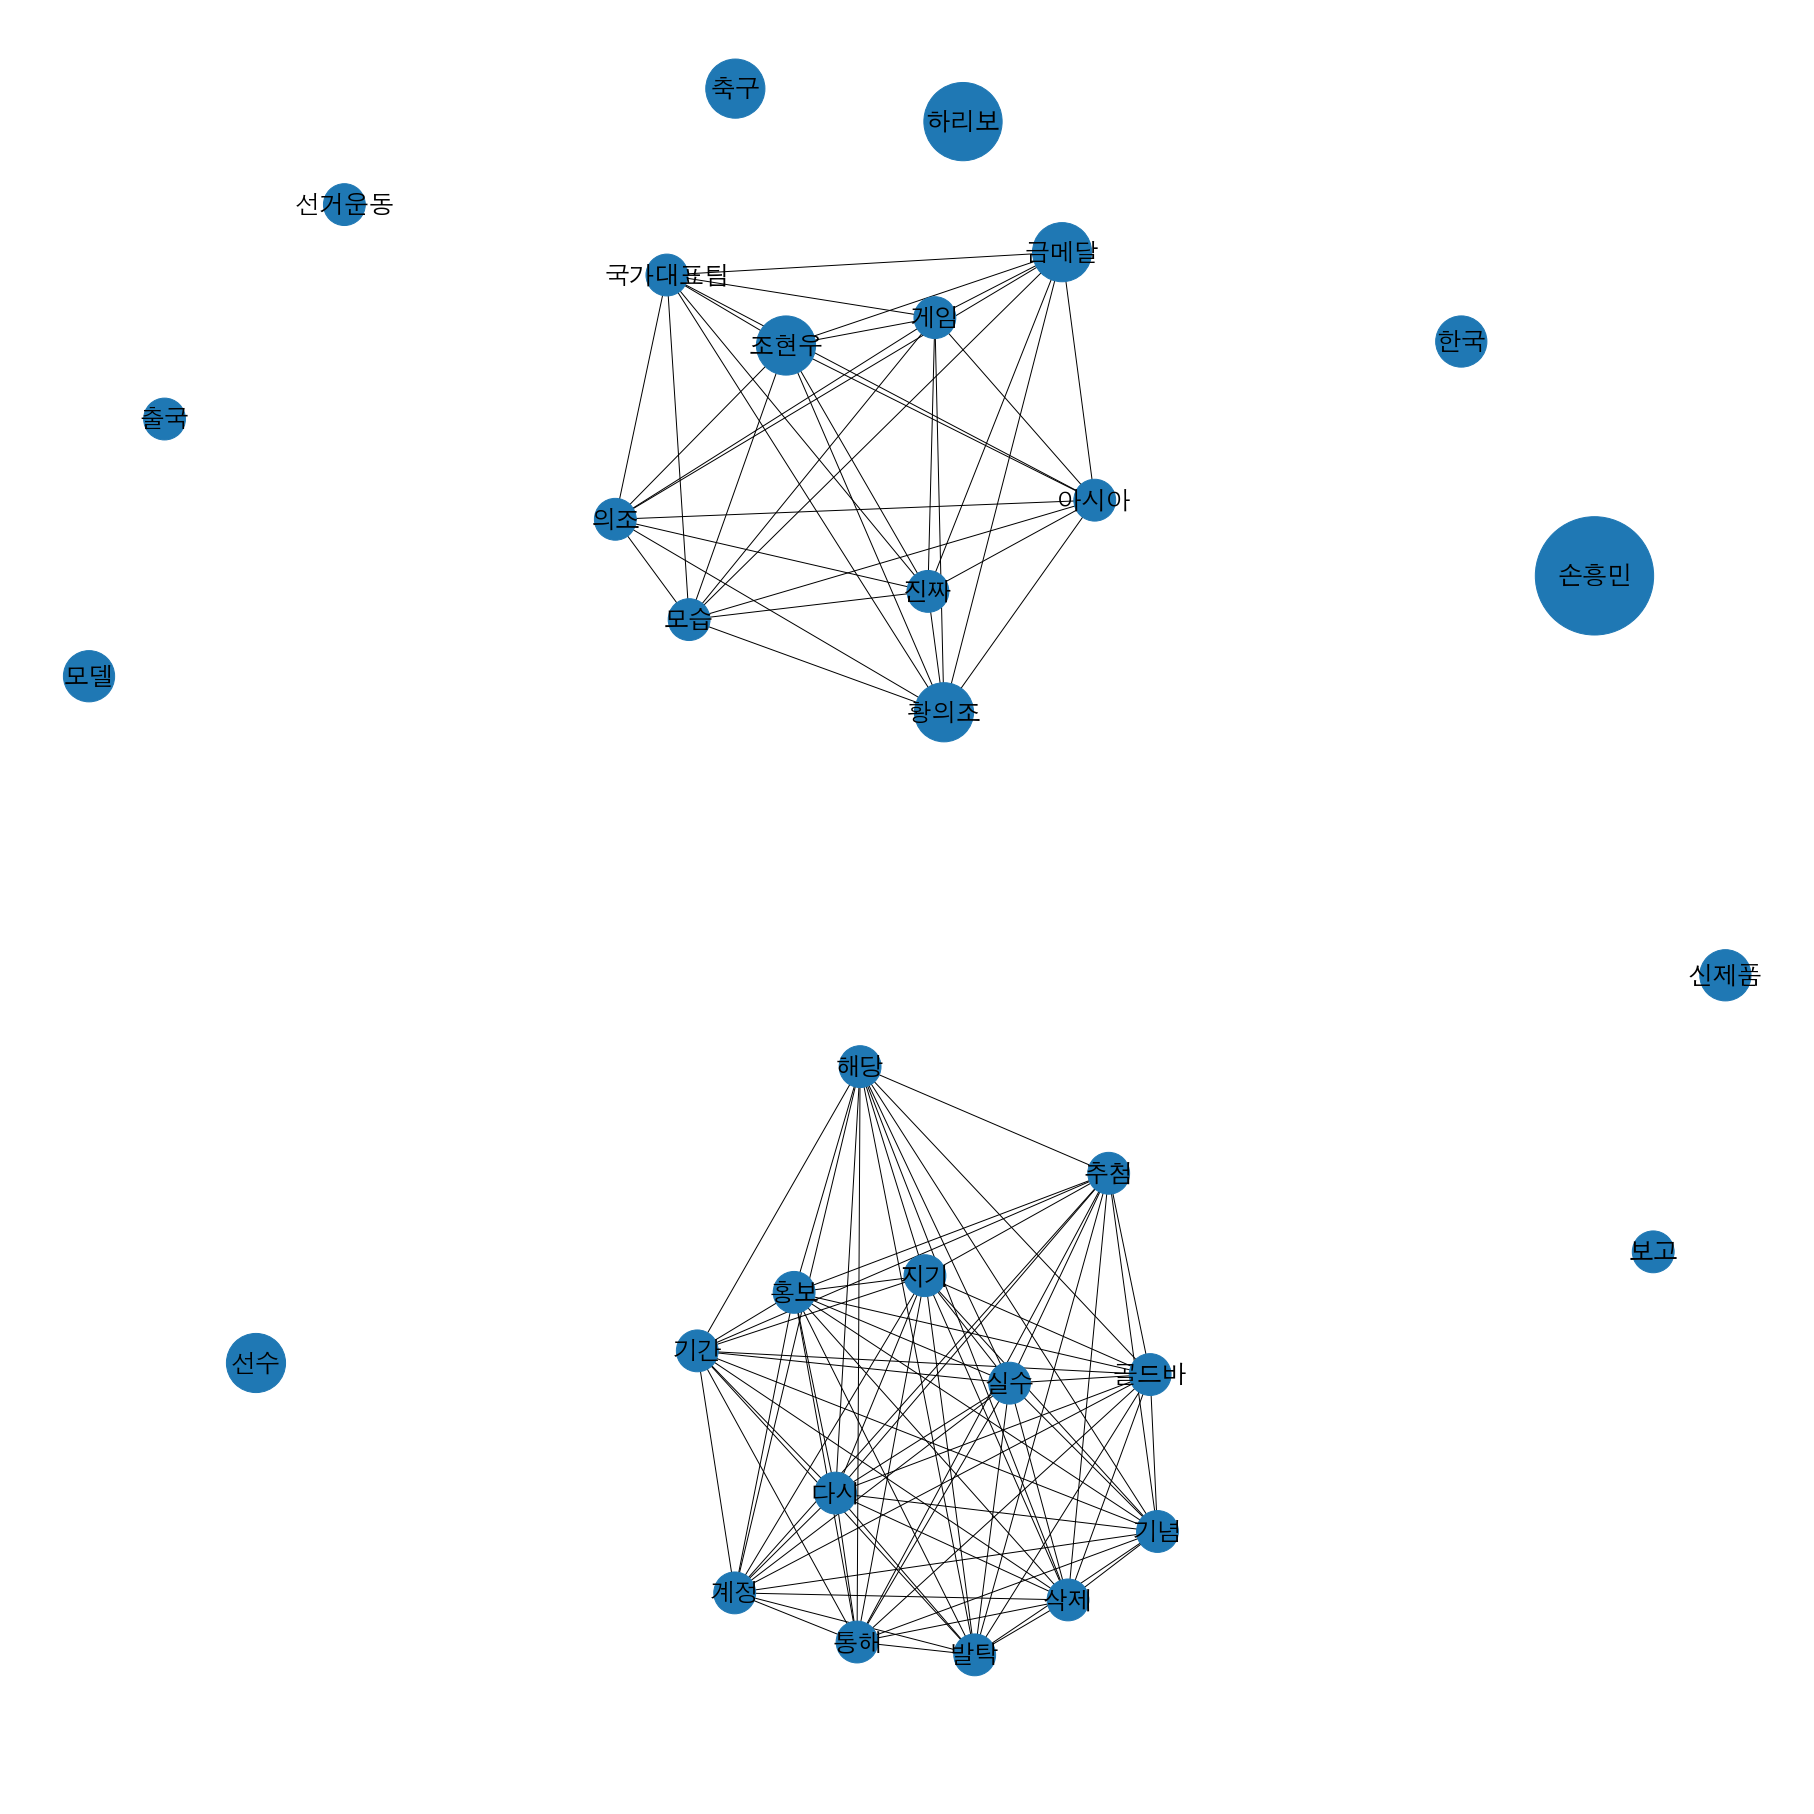

In [24]:
!pip install networkx
import networkx as nx
plt.figure(figsize=(25,25))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])
    
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

# Windows 사용자는 AppleGothic 대신,'Malgun Gothic'. 그 외 OS는 OS에서 한글을 지원하는 기본 폰트를 입력합니다.
nx.draw_networkx_labels(G, pos=pos, font_family='AppleGothic', font_size=25)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()

## TMDB 5000 세트를 이용한 콘텐츠 기반 필터링 추천 시스템

### 데이터 읽어오기

In [25]:
movies =pd.read_csv('./data/tmdb/tmdb_5000_movies.csv')
print(movies.shape)
movies.head(1)

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


### 데이터 생성

In [26]:
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count',
                 'popularity', 'keywords', 'overview']]

pd.set_option('max_colwidth', 100)
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."


### 데이터 변환

In [27]:
from ast import literal_eval

#문자열을 파이썬 객체로 변환
movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

#디셔너리에서 데이터만 추출
movies_df['genres'] = movies_df['genres'].apply(lambda x : [ y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [ y['name'] for y in x])

#데이터 확인
movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa..."


### 피처 벡터 행렬 생성

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 적용하기 위해 공백문자로 word 단위가 구분되는 문자열로 변환. 
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


### 문장의 유사도 측정

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]]


### 유사도 측정

In [32]:
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]
print(genre_sim_sorted_ind[:1])

[[   0 3494  813 ... 3038 3037 2401]]


### 장르 콘텐츠 필터를 위한 함수

In [33]:
#기반 데이터인 movies df DataFrame 
#레코드별 장르 코사인 유사도 인덱스를 가지고 있는 genre_sim_sorted_ind
#고객이 선정한 추천 기준이 되는 영화 제목
#추천할 영화 건수를 입력
#추천 영화 정보를 가지는 DataFrame을 반환
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    
    # 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_movie = df[df['title'] == title_name]
    
    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]

### 영화 추천

In [34]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average']]

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


### 평점 확인

In [35]:
movies_df[['title','vote_average','vote_count']].sort_values('vote_average', ascending=False)[:10]

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


### 가중 평점

In [36]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print('C:',round(C,3), 'm:',round(m,3))

C: 6.092 m: 370.2


In [37]:
percentile = 0.6
m = movies_df['vote_count'].quantile(percentile)
C = movies_df['vote_average'].mean()

def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ( (v/(v+m)) * R ) + ( (m/(m+v)) * C )   

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1) 

In [38]:
movies_df[['title','vote_average','weighted_vote','vote_count']].sort_values('weighted_vote',
                                                                          ascending=False)[:10]

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


### 가중 점수를 이용한 영화 추천

In [39]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values
    
    # top_n의 2배에 해당하는 쟝르 유사성이 높은 index 추출 
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
# 기준 영화 index는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
    
    # top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출 
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average', 'weighted_vote']]

,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427


## 아이템 기반 최근접 이웃 협업 필터링

### 데이터 읽어오기

In [41]:
movies = pd.read_csv('./data/movielens/movies.csv')
ratings = pd.read_csv('./data/movielens/ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [42]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [43]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### 머신러닝을 위한 데이터 구조 만들기

In [44]:
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
ratings_matrix.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# title 컬럼을 얻기 이해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

# NaN 값을 모두 0 으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 영화간 유사도 산출

In [46]:
#영화 제목을 인덱스로 설정
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#영화를 기준으로 코사인 유사도 산출
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

# cosine_similarity() 로 반환된 넘파이 행렬을 영화명을 매핑하여 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns=ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head(3)


(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [48]:
item_sim_df["Godfather, The (1972)"].sort_values(ascending=False)[:6]

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

In [49]:
item_sim_df["Inception (2010)"].sort_values(ascending=False)[1:6]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

### 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천

In [50]:
#사용자가 본 영화에 대한 실제 평점 과 다른 모든 영화와의 코사인 유사도를 내적 곱한 값을 전체 합으로 나눔 
def predict_rating(ratings_arr, item_sim_arr ):
    ratings_pred = ratings_arr.dot(item_sim_arr)/ np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [51]:
#개인화된 예측 평점 확인
ratings_pred = predict_rating(ratings_matrix.values , item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


In [52]:
#평가 확인
from sklearn.metrics import mean_squared_error

# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE 를 구함. 
def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 인접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))

아이템 기반 모든 인접 이웃 MSE:  9.895354759094706


In [53]:
# 유사도가 높은 영화 와의 유사도 값만을 이용해서 예측함수를 새로 생성
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
    pred = np.zeros(ratings_arr.shape)

    # 사용자-아이템 평점 행렬의 열 크기만큼 Loop 수행. 
    for col in range(ratings_arr.shape[1]):
        # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 index 반환
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
        # 개인화된 예측 평점을 계산
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T) 
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))        
    return pred

In [54]:
ratings_pred = predict_rating_topsim(ratings_matrix.values , item_sim_df.values, n=20)
print('아이템 기반 인접 TOP-20 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))


# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)


아이템 기반 인접 TOP-20 이웃 MSE:  3.695009387428144


In [55]:
#9번째 유저에 영화 추천
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[ user_rating_id > 0].sort_values(ascending=False)[:10]

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

In [56]:
#유저가 보지 않은 영화 리스트를 만들어주는 함수
def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[userId,:]
    
    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 영화명을 list 객체로 만듬. 
    movies_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [57]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

In [58]:
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies


,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591


## 행렬 분해를 이용한 잠재 요인 협업 필터링

### SVD를 이용한 행렬 분해

In [59]:
from numpy.linalg import svd
A = np.array([[3, -1], [1, 3], [1, 1]]) 
U, S, VT = svd(A)

In [60]:
U

array([[-4.08248290e-01,  8.94427191e-01, -1.82574186e-01],
       [-8.16496581e-01, -4.47213595e-01, -3.65148372e-01],
       [-4.08248290e-01, -1.94289029e-16,  9.12870929e-01]])

In [61]:
S

array([3.46410162, 3.16227766])

In [62]:
VT

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [63]:
np.diag(S, 1)[:, 1:]

array([[3.46410162, 0.        ],
       [0.        , 3.16227766],
       [0.        , 0.        ]])

In [64]:
U @ np.diag(S, 1)[:, 1:] @ VT

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

## SGD를 이용한 협업 필터링을 이용한 영화 추천

### 분해된 행렬을 이용해서 내적 곱을 구하고 RMSE 값을 리턴해주는 함수

In [65]:
import numpy as np
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적 곱으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

### SGD를 이용한 행렬 분해 함수 

In [66]:
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력합니다. 
    np.random.seed(1)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))

    break_count = 0
       
    # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장. 
    non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]
   
    # SGD기법으로 P와 Q 매트릭스를 계속 업데이트. 
    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
       
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
            
    return P, Q

### 영화 정보 데이터를 가져와서 데이터프레임으로 생성

In [69]:
movies = pd.read_csv('./data/movielens/movies.csv')
ratings = pd.read_csv('./data/movielens/ratings.csv')
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')

# title 컬럼을 얻기 이해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

### 행렬 분해 수행

In [70]:
P, Q = matrix_factorization(ratings_matrix.values, K=50, steps=200, learning_rate=0.01, r_lambda = 0.01)
pred_matrix = np.dot(P, Q.T)

### iteration step :  0  rmse :  2.9023619751336867
### iteration step :  10  rmse :  0.7335768591017927
### iteration step :  20  rmse :  0.5115539026853442
### iteration step :  30  rmse :  0.37261628282537446
### iteration step :  40  rmse :  0.29608182991810134
### iteration step :  50  rmse :  0.2520353192341642
### iteration step :  60  rmse :  0.22487503275269854
### iteration step :  70  rmse :  0.20685455302331535
### iteration step :  80  rmse :  0.19413418783028688
### iteration step :  90  rmse :  0.18470082002720406
### iteration step :  100  rmse :  0.17742927527209104
### iteration step :  110  rmse :  0.17165226964707492
### iteration step :  120  rmse :  0.16695181946871726
### iteration step :  130  rmse :  0.16305292191997542
### iteration step :  140  rmse :  0.15976691929679646
### iteration step :  150  rmse :  0.1569598699945732
### iteration step :  160  rmse :  0.15453398186715428
### iteration step :  170  rmse :  0.15241618551077643
### iteration step :  180 

### 데이터 프레임으로 변환

In [71]:
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.055084,4.092018,3.564130,4.502167,3.981215,1.271694,3.603274,2.333266,5.091749,3.972454,...,1.402608,4.208382,3.705957,2.720514,2.787331,3.475076,3.253458,2.161087,4.010495,0.859474
2,3.170119,3.657992,3.308707,4.166521,4.311890,1.275469,4.237972,1.900366,3.392859,3.647421,...,0.973811,3.528264,3.361532,2.672535,2.404456,4.232789,2.911602,1.634576,4.135735,0.725684
3,2.307073,1.658853,1.443538,2.208859,2.229486,0.780760,1.997043,0.924908,2.970700,2.551446,...,0.520354,1.709494,2.281596,1.782833,1.635173,1.323276,2.887580,1.042618,2.293890,0.396941


### 영화 추천

In [72]:
#영화를 보지 않은 목록을 리턴하는 함수
def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[userId,:]
    
    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 영화명을 list 객체로 만듬. 
    movies_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [73]:
#보지 않은 영화를 예측 평점이 높은 순으로 정렬해서 리턴
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

In [74]:
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

,pred_score
title,
Rear Window (1954),5.704612
"South Park: Bigger, Longer and Uncut (1999)",5.451100
Rounders (1998),5.298393
Blade Runner (1982),5.244951
Roger & Me (1989),5.191962
Gattaca (1997),5.183179
Ben-Hur (1959),5.130463
Rosencrantz and Guildenstern Are Dead (1990),5.087375
"Big Lebowski, The (1998)",5.038690


## Surprise 패키지를 이용한 추천 시스템

In [75]:
!pip install scikit-surprise

### 데이터 가져오기

In [78]:
import surprise
from surprise import SVD
from surprise import Dataset 
from surprise import accuracy 
from surprise.model_selection import train_test_split

data = Dataset.load_builtin(name='ml-100k', prompt=True)
trainset, testset = train_test_split(data, test_size=.25, random_state=42) 

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/adam/.surprise_data/ml-100k


### 알고리즘을 선택해서 훈련

In [79]:
algo = SVD()
algo.fit(trainset) 

In [80]:
predictions = algo.test( testset )
print('prediction type :',type(predictions), ' size:',len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type : <class 'list'>  size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='391', iid='591', r_ui=4.0, est=3.2540625006575534, details={'was_impossible': False}),
 Prediction(uid='181', iid='1291', r_ui=1.0, est=1.473033428664422, details={'was_impossible': False}),
 Prediction(uid='637', iid='268', r_ui=2.0, est=2.702901475110616, details={'was_impossible': False}),
 Prediction(uid='332', iid='451', r_ui=5.0, est=3.9087983177812937, details={'was_impossible': False}),
 Prediction(uid='271', iid='204', r_ui=4.0, est=3.63141306587974, details={'was_impossible': False})]

### 추천 정보를 리스트로 변환

In [81]:
[ (pred.uid, pred.iid, pred.est) for pred in predictions[:3] ]

[('391', '591', 3.2540625006575534),
 ('181', '1291', 1.473033428664422),
 ('637', '268', 2.702901475110616)]

### 추천 예측 평점

In [82]:
# 사용자 아이디, 아이템 아이디는 문자열로 입력해야 함. 
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.15   {'was_impossible': False}


### 평균 제곱 오차 확인

In [83]:
accuracy.rmse(predictions)

RMSE: 0.9419


0.9418817874232063

### Surprise 모듈

### 데이터 읽어오기

In [86]:
from surprise import Reader
ratings = pd.read_csv('./data/movielens/ratings.csv')
# ratings_noh.csv 파일로 unload 시 index 와 header를 모두 제거한 새로운 파일 생성.  
ratings.to_csv('./data/movielens/ratings_noh.csv', index=False, header=False)
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
data=Dataset.load_from_file('./data/movielens/ratings_noh.csv',reader=reader)

### 데이터 훈련

In [87]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

# 수행시마다 동일한 결과 도출을 위해 random_state 설정 
algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습 후 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset) 
predictions = algo.test( testset )
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

### 교차검증

In [89]:
from surprise.model_selection import cross_validate 

# Pandas DataFrame에서 Surprise Dataset으로 데이터 로딩 
ratings = pd.read_csv('./data/movielens/ratings.csv') # reading data in pandas df
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0) 
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True) 

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8678  0.8694  0.8763  0.8640  0.8824  0.8720  0.0066  
MAE (testset)     0.6663  0.6673  0.6682  0.6670  0.6791  0.6696  0.0048  
Fit time          5.16    5.20    5.20    5.02    4.95    5.10    0.10    
Test time         0.28    0.31    0.31    0.28    0.28    0.29    0.01    


{'test_rmse': array([0.86775044, 0.86940692, 0.87630674, 0.86401833, 0.88239549]),
 'test_mae': array([0.66629731, 0.66734412, 0.66818847, 0.6669541 , 0.67912261]),
 'fit_time': (5.161243915557861,
  5.1972739696502686,
  5.199076175689697,
  5.016700983047485,
  4.948949098587036),
 'test_time': (0.28032994270324707,
  0.3065481185913086,
  0.308704137802124,
  0.27959585189819336,
  0.2785658836364746)}

### 하이퍼파라미터 튜닝

In [90]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터들을 딕셔너리 형태로 지정. 
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200] }

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse 로 수행 하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8769070771046173
{'n_epochs': 20, 'n_factors': 50}


### 영화 정보를 읽어서 훈련

In [91]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성. 
data_folds = DatasetAutoFolds(ratings_file='./data/movielens/ratings_noh.csv', reader=reader)

#전체 데이터를 학습데이터로 생성함. 
trainset = data_folds.build_full_trainset()

algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

### 영화정보를 읽어서 평점 확인

In [ ]:
# 영화에 대한 상세 속성 정보 DataFrame로딩
movies = pd.read_csv('./data/movielens/movies.csv')

# userId=9 의 movieId 데이터 추출하여 movieId=42 데이터가 있는지 확인. 
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

### 예측

In [ ]:
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose=True)

### 유저별 영화 정보 확인

In [ ]:
def get_unseen_surprise(ratings, movies, userId):
    #입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
    seen_movies = ratings[ratings['userId']== userId]['movieId'].tolist()
    
    # 모든 영화들의 movieId를 리스트로 생성. 
    total_movies = movies['movieId'].tolist()
    
    # 모든 영화들의 movieId중 이미 평점을 매긴 영화의 movieId를 제외하여 리스트로 생성
    unseen_movies= [movie for movie in total_movies if movie not in seen_movies]
    print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies), \
          '전체 영화수:',len(total_movies))
    
    return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

In [ ]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    # 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]
    
    # predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음.
    # [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]
    # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의함.
    # sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행.
    def sortkey_est(pred):
        return pred.est
    
    # sortkey_est( ) 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출.
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions= predictions[:top_n]
    
    # top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
    top_movie_ids = [ int(pred.iid) for pred in top_predictions]
    top_movie_rating = [ pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    top_movie_preds = [ (id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]
    
    return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)
print('##### Top-10 추천 영화 리스트 #####')

for top_movie in top_movie_preds:
    print(top_movie[1], ":", top_movie[2])

## 상품 추천

### 데이터 읽어오기

In [93]:
# 영국 선물샵 온라인 도매 거래 데이터
df = pd.read_csv("./data/online_retail.csv", dtype={'CustomerID': str,'InvoiceID': str}, encoding="ISO-8859-1")

#데이터의 자료형 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")

### 데이터 확인

In [94]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [96]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 데이터 전처리

In [97]:
#결측치 제거
df = df.dropna()
print(df.shape)

(406829, 8)


In [98]:
#상품 수량이 음수인 경우를 제거
print(df[df['Quantity']<=0].shape[0])
df = df[df['Quantity']>0]

8905


In [99]:
#상품 가격이 0 이하인 경우를 제거
print(df[df['UnitPrice']<=0].shape[0])
df = df[df['UnitPrice']>0]

40


In [100]:
# 상품 코드가 일반적이지 않은 경우를 탐색
df['ContainDigit'] = df['StockCode'].apply(lambda x: any(c.isdigit() for c in x))
print(df[df['ContainDigit'] == False].shape[0])
df[df['ContainDigit'] == False].head()

1414


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContainDigit
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France,False
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands,False
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany,False
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,False
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,False


In [101]:
# 상품 코드가 일반적이지 않은 경우를 제거합니다.
df = df[df['ContainDigit'] == True]

### 탐색적 데이터 분석

In [102]:
# 거래 데이터에서 가장 오래된 데이터와 가장 최신의 데이터를 탐색
df['date'] = df['InvoiceDate'].dt.date
print(df['date'].min())
print(df['date'].max())

2010-12-01
2011-12-09


<AxesSubplot:xlabel='date'>

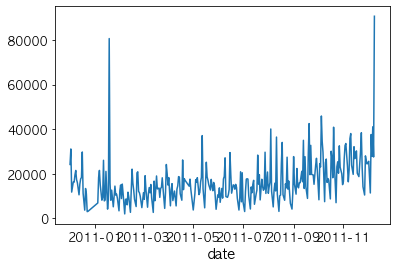

In [103]:
# 일자별 총 거래 수량을 탐색
date_quantity_series = df.groupby('date')['Quantity'].sum()
date_quantity_series.plot()

<AxesSubplot:xlabel='date'>

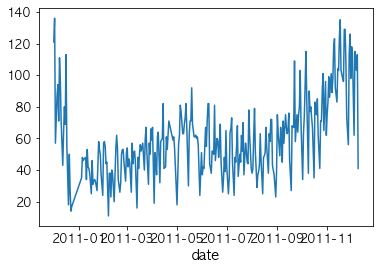

In [104]:
# 일자별 총 거래 횟수를 탐색
date_transaction_series = df.groupby('date')['InvoiceNo'].nunique()
date_transaction_series.plot()

<AxesSubplot:xlabel='date'>

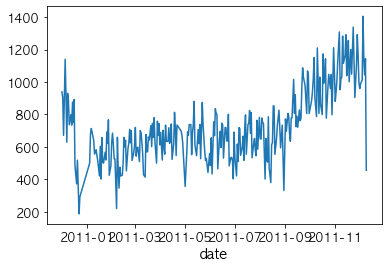

In [105]:
# 일자별 거래된 상품의 unique한 갯수, 즉 상품 거래 다양성을 탐색
date_unique_item_series = df.groupby('date')['StockCode'].nunique()
date_unique_item_series.plot()

In [106]:
# 총 유저의 수를 계산하여 출력
print(len(df['CustomerID'].unique()))

4334


In [107]:
# 유저별 거래 횟수를 탐색
customer_unique_transaction_series = df.groupby('CustomerID')['InvoiceNo'].nunique()
customer_unique_transaction_series.describe()

count    4334.000000
mean        4.246654
std         7.642535
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: InvoiceNo, dtype: float64

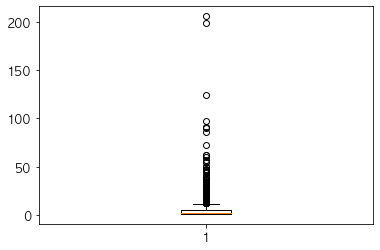

In [108]:
# 상자 그림 시각화
plt.boxplot(customer_unique_transaction_series.values)
plt.show()

In [109]:
# 유저별 아이템 구매 종류 개수를 탐색
customer_unique_item_series = df.groupby('CustomerID')['StockCode'].nunique()
customer_unique_item_series.describe()

count    4334.000000
mean       61.432856
std        85.312937
min         1.000000
25%        16.000000
50%        35.000000
75%        77.000000
max      1786.000000
Name: StockCode, dtype: float64

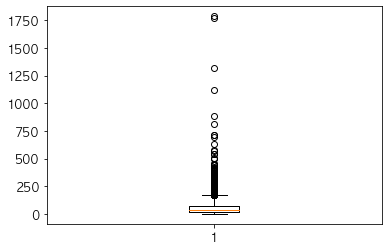

In [110]:
# 상자 그림 시각화
plt.boxplot(customer_unique_item_series.values)
plt.show()

In [111]:
# 총 상품 갯수를 탐색
print(len(df['StockCode'].unique()))

3660


In [112]:
# 가장 거래가 많은 상품 top 10 탐색
df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending=False)[:10]

StockCode
85123A    1978
22423     1703
85099B    1600
47566     1379
84879     1375
20725     1289
22720     1146
23203     1080
20727     1052
22383     1043
Name: InvoiceNo, dtype: int64

count     3660.000000
mean      1409.149727
std       3513.654056
min          1.000000
25%         65.000000
50%        395.000000
75%       1417.500000
max      80995.000000
Name: Quantity, dtype: float64


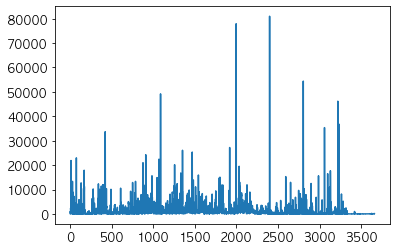

In [113]:
# 상품별 판매수량 분포를 탐색
print(df.groupby('StockCode')['Quantity'].sum().describe())
plt.plot(df.groupby('StockCode')['Quantity'].sum().values)
plt.show()

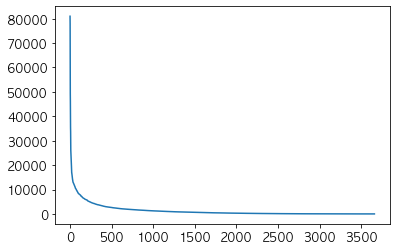

In [114]:
# 분포를 정렬하여 출력
plt.plot(df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).values)
plt.show()

In [115]:
# 거래별로 발생한 가격에 대해 탐색
df['amount'] = df['Quantity'] * df['UnitPrice']
df.groupby('InvoiceNo')['amount'].sum().describe()

count     18405.000000
mean        476.378845
std        1678.749892
min           0.380000
25%         157.900000
50%         302.360000
75%         465.700000
max      168469.600000
Name: amount, dtype: float64

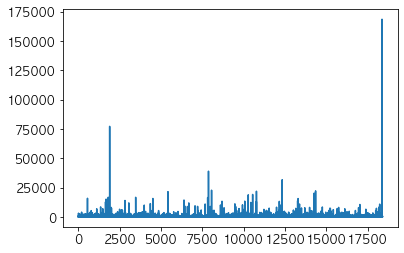

In [116]:
# 거래별로 발생한 가격 분포를 탐색
plt.plot(df.groupby('InvoiceNo')['amount'].sum().values)
plt.show()

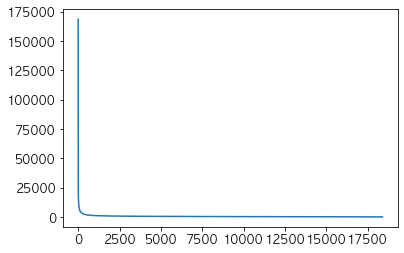

In [117]:
# 분포를 정렬하여 출력
plt.plot(df.groupby('InvoiceNo')['amount'].sum().sort_values(ascending=False).values)
plt.show()

In [118]:
import datetime

# 2011년 11월을 기준으로 하여, 기준 이전과 이후로 데이터를 분리
df_year_round = df[df['date'] < datetime.date(2011, 11, 1)]
df_year_end = df[df['date'] >= datetime.date(2011, 11, 1)]
print(df_year_round.shape)
print(df_year_end.shape)

(314902, 11)
(81568, 11)


In [119]:
# 11월 이전 데이터에서 구매했던 상품의 set을 추출
customer_item_round_set = df_year_round.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_round_set)

CustomerID
12346                                                                                                {23166}
12347    {22772, 21976, 22729, 22774, 23421, 22134, 23162, 23308, 84997B, 22432, 20719, 21578, 21636, 235...
12348    {21213, 21967, 22952, 21211, 21983, 21977, 84992, 21982, 22616, 21980, 22951, 23078, 23076, 2198...
12350    {21171, 22557, 84086C, 20652, 20615, 21866, 21864, 22551, 79191C, 22620, 22348, 21915, 22412, 21...
12352    {22784, 21314, 22646, 21770, 22801, 22979, 84510A, 21731, 22993, 37495, 22634, 22550, 21755, 840...
                                                        ...                                                 
18280                                 {22467, 22180, 22611, 22727, 22495, 22725, 22499, 22358, 22084, 82484}
18281                                                      {22467, 22037, 23209, 23008, 23007, 22028, 22716}
18282                                                      {21108, 21270, 21109, 22424, 23187, 22089, 23295}
18283   

In [120]:
# 11월 이전에 구매했는지 혹은 이후에 구매했는지를 유저별로 기록하기 위한 사전을 정의
customer_item_dict = {}

# 11월 이전에 구매한 상품은 'old'라고 표기합니다.
for customer_id, stocks in customer_item_round_set.items():
    customer_item_dict[customer_id] = {}
    for stock_code in stocks:
        customer_item_dict[customer_id][stock_code] = 'old'

print(str(customer_item_dict)[:100] + "...")

{'12346': {'23166': 'old'}, '12347': {'22772': 'old', '21976': 'old', '22729': 'old', '22774': 'old'...


In [121]:
# 11월 이후 데이터에서 구매하는 상품의 set을 추출
customer_item_end_set = df_year_end.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_end_set)

CustomerID
12347                         {21265, 23552, 23506, 23084, 23497, 21731, 21064, 23271, 84625A, 23508, 20719}
12349    {22557, 20685, 22553, 21231, 23439, 48194, 21411, 21531, 23493, 37500, 22554, 21787, 22195, 2113...
12352     {23096, 23089, 23367, 22627, 23088, 22178, 23559, 22982, 22624, 22978, 22635, 22668, 23368, 21669}
12356                                                                                         {21843, 22423}
12357    {37449, 21116, 15056P, 21844, 21507, 37495, 35598B, 84029G, 21232, 23267, 22072, 22067, 23356, 2...
                                                        ...                                                 
18272    {72799C, 23358, 22965, 22075, 22993, 72799E, 20914, 22666, 22076, 22960, 22074, 84380, 22722, 23...
18273                                                                                               {79302M}
18274                         {84988, 21231, 21108, 22851, 23243, 23245, 84509A, 21974, 22423, 22989, 22720}
18282   

In [122]:
# 11월 이전에만 구매한 상품은 'old', 이후에만 구매한 상품은 'new', 모두 구매한 상품은 'both'라고 표기
for customer_id, stocks in customer_item_end_set.items():
    # 11월 이전 구매기록이 있는 유저인지를 체크
    if customer_id in customer_item_dict:
        for stock_code in stocks:
            # 구매한 적 있는 상품인지를 체크한 뒤, 상태를 표기
            if stock_code in customer_item_dict[customer_id]:
                customer_item_dict[customer_id][stock_code] = 'both'
            else:
                customer_item_dict[customer_id][stock_code] = 'new'
    
    # 11월 이전 구매기록이 없는 유저라면 모두 'new'로 표기
    else:
        customer_item_dict[customer_id] = {}
        for stock_code in stocks:
            customer_item_dict[customer_id][stock_code] = 'new'

print(str(customer_item_dict)[:100] + "...")

{'12346': {'23166': 'old'}, '12347': {'22772': 'old', '21976': 'old', '22729': 'old', '22774': 'old'...


In [123]:
# 'old', 'new', 'both'를 유저별로 탐색하여 데이터 프레임을 생성
columns = ['CustomerID', 'old', 'new', 'both']
df_order_info = pd.DataFrame(columns=columns)

# 데이터 프레임을 생성하는 과정
for customer_id in customer_item_dict:
    old = 0
    new = 0
    both = 0
    
    # 딕셔너리의 상품 상태(old, new, both)를 체크하여 데이터 프레임에 append 할 수 있는 형태로 처리
    for stock_code in customer_item_dict[customer_id]:
        status = customer_item_dict[customer_id][stock_code]
        if status == 'old':
            old += 1
        elif status == 'new':
            new += 1
        else:
            both += 1
    
    # df_order_info에 데이터를 append
    row = [customer_id, old, new, both]
    series = pd.Series(row, index=columns)
    df_order_info = df_order_info.append(series, ignore_index=True)

df_order_info.head()

,CustomerID,old,new,both
0,12346,1,0,0
1,12347,92,3,8
2,12348,21,0,0
3,12350,16,0,0
4,12352,43,12,2


In [124]:
# 데이터 프레임에서 전체 유저 수를 출력
print(df_order_info.shape[0])

# 데이터 프레임에서 old가 1 이상이면서, new가 1 이상인 유저 수를 출력
# 11월 이후에 기존에 구매한적 없는 새로운 상품을 구매한 유저를 의미
print(df_order_info[(df_order_info['old'] > 0) & (df_order_info['new'] > 0)].shape[0])

# 데이터 프레임에서 both가 1 이상인 유저 수를 출력
# 재구매한 상품이 있는 유저 수를 의미
print(df_order_info[df_order_info['both'] > 0].shape[0])

4334
1446
1426


In [125]:
# new 피처의 value_counts를 출력하여, 새로운 상품을 얼마나 구매하는지 탐색
df_order_info['new'].value_counts()

0      2521
1        81
3        73
2        72
8        65
       ... 
116       1
157       1
124       1
130       1
99        1
Name: new, Length: 133, dtype: int64

In [126]:
# 만약 새로운 상품을 구매한다면, 얼마나 많은 종류의 새로운 상품을 구매하는지 탐색
print(df_order_info['new'].value_counts()[1:].describe())

count    132.000000
mean      13.734848
std       19.130672
min        1.000000
25%        1.000000
50%        5.000000
75%       16.000000
max       81.000000
Name: new, dtype: float64


### SVD를 이용한 상품 구매 예측

In [127]:
# 추천 대상 데이터에 포함되는 유저와 상품의 갯수를 출력
print(len(df_year_round['CustomerID'].unique()))
print(len(df_year_round['StockCode'].unique()))

3970
3608


In [128]:
# Rating 데이터를 생성하기 위한 탐색 : 유저-상품간 구매 횟수를 탐색
uir_df = df_year_round.groupby(['CustomerID', 'StockCode'])['InvoiceNo'].nunique().reset_index()
uir_df.head()

,CustomerID,StockCode,InvoiceNo
0,12346,23166,1
1,12347,16008,1
2,12347,17021,1
3,12347,20665,1
4,12347,20719,3


<AxesSubplot:>

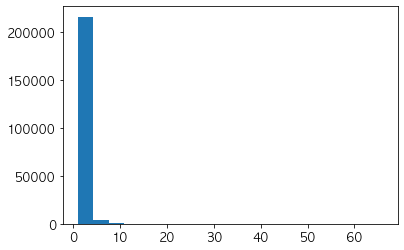

In [129]:
# Rating(InvoiceNo) 피처의 분포를 탐색
uir_df['InvoiceNo'].hist(bins=20, grid=False)

<AxesSubplot:>

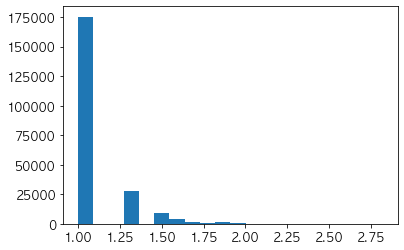

In [130]:
# Rating(InvoiceNo) 피처를 log normalization 해준 뒤, 다시 분포를 탐색
uir_df['InvoiceNo'].apply(lambda x: np.log10(x)+1).hist(bins=20, grid=False)

<AxesSubplot:>

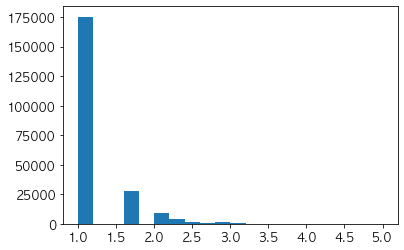

In [131]:
# 1~5 사이의 점수로 변환
uir_df['Rating'] = uir_df['InvoiceNo'].apply(lambda x: np.log10(x)+1)
uir_df['Rating'] = ((uir_df['Rating'] - uir_df['Rating'].min()) / 
                    (uir_df['Rating'].max() - uir_df['Rating'].min()) * 4) + 1
uir_df['Rating'].hist(bins=20, grid=False)

In [132]:
# SVD 모델 학습을 위한 데이터셋을 생성
uir_df = uir_df[['CustomerID', 'StockCode', 'Rating']]
uir_df.head()

,CustomerID,StockCode,Rating
0,12346,23166,1.000000
1,12347,16008,1.000000
2,12347,17021,1.000000
3,12347,20665,1.000000
4,12347,20719,2.048881


In [133]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성
# 대략적인 성능을 알아보기 위해 학습 데이터와 테스트 데이터를 8:2로 분할
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode', 'Rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

# SVD 모델을 학습
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

predictions = model.test(test_data)

# 테스트 데이터의 RMSE를 출력하여 모델의 성능을 평가
print("RMSE of test dataset in SVD model:")
accuracy.rmse(predictions)

training time of model: 34.04 seconds
RMSE of test dataset in SVD model:
RMSE: 0.3335


0.3334912659840319

In [ ]:
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성
#11월 이전 전체를 full trainset으로 활용
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode', 'Rating']], reader)
train_data = data.build_full_trainset()

# SVD 모델을 학습합니다.
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

### 상품 추천 시뮬레이션

In [ ]:
"""
11월 이전 데이터에서 유저-상품에 대한 Rating을 기반으로 추천 상품을 선정

1. 이전에 구매하지 않았던 상품 추천 : anti_build_testset()을 사용
2. 이전에 구매했던 상품 다시 추천 : build_testset()을 사용
3. 모든 상품을 대상으로 하여 상품 추천
"""

# 이전에 구매하지 않았던 상품을 예측의 대상으로 선정
test_data = train_data.build_anti_testset()
target_user_predictions = model.test(test_data)

# 구매 예측 결과를 딕셔너리 형태로 변환
new_order_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in new_order_prediction_dict:
        if stock_code in new_order_prediction_dict[customer_id]:
            pass
        else:
            new_order_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        new_order_prediction_dict[customer_id] = {}
        new_order_prediction_dict[customer_id][stock_code] = predicted_rating

print(str(new_order_prediction_dict)[:300] + "...")

In [ ]:
# 이전에 구매했었던 상품을 예측의 대상으로 선정
test_data = train_data.build_testset()
target_user_predictions = model.test(test_data)

# 구매 예측 결과를 딕셔너리 형태로 변환
reorder_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in reorder_prediction_dict:
        if stock_code in reorder_prediction_dict[customer_id]:
            pass
        else:
            reorder_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        reorder_prediction_dict[customer_id] = {}
        reorder_prediction_dict[customer_id][stock_code] = predicted_rating
        
print(str(reorder_prediction_dict)[:300] + "...")

In [ ]:
# 두 딕셔너리를 하나로 통합
total_prediction_dict = {}

# new_order_prediction_dict 정보를 새로운 딕셔너리에 저장
for customer_id in new_order_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in new_order_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            
# reorder_prediction_dict 정보를 새로운 딕셔너리에 저장
for customer_id in reorder_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in reorder_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            
print(str(total_prediction_dict)[:300] + "...")

In [ ]:
# 11월 이후의 데이터를 테스트 데이터셋으로 사용하기 위한 데이터프레임을 생성
simulation_test_df = df_year_end.groupby('CustomerID')['StockCode'].apply(set).reset_index()
simulation_test_df.columns = ['CustomerID', 'RealOrdered']
simulation_test_df.head()

In [ ]:
# 이 데이터프레임에 상품 추천 시뮬레이션 결과를 추가하기 위한 함수를 정의
def add_predicted_stock_set(customer_id, prediction_dict):
    if customer_id in prediction_dict:
        predicted_stock_dict = prediction_dict[customer_id]
        # 예측된 상품의 Rating이 높은 순으로 정렬
        sorted_stocks = sorted(predicted_stock_dict, key=lambda x : predicted_stock_dict[x], reverse=True)
        return sorted_stocks
    else:
        return None

# 상품 추천 시뮬레이션 결과를 추가
simulation_test_df['PredictedOrder(New)'] = simulation_test_df['CustomerID']. \
                                            apply(lambda x: add_predicted_stock_set(x, new_order_prediction_dict))
simulation_test_df['PredictedOrder(Reorder)'] = simulation_test_df['CustomerID']. \
                                            apply(lambda x: add_predicted_stock_set(x, reorder_prediction_dict))
simulation_test_df['PredictedOrder(Total)'] = simulation_test_df['CustomerID']. \
                                            apply(lambda x: add_predicted_stock_set(x, total_prediction_dict))
simulation_test_df.head()

## 모델 평가하기

In [ ]:
# 구매 예측의 상위 k개의 recall(재현율)을 평가 기준으로 정의합니다.
def calculate_recall(real_order, predicted_order, k):
    # 만약 추천 대상 상품이 없다면, 11월 이후에 상품을 처음 구매하는 유저입니다.
    if predicted_order is None:
        return None
    
    # SVD 모델에서 현재 유저의 Rating이 높은 상위 k개의 상품을 "구매 할 것으로 예측"합니다.
    predicted = predicted_order[:k]
    true_positive = 0
    for stock_code in predicted:
        if stock_code in real_order:
            true_positive += 1
    
    # 예측한 상품 중, 실제로 유저가 구매한 상품의 비율(recall)을 계산합니다.
    recall = true_positive / len(predicted)
    return recall

# 시뮬레이션 대상 유저에게 상품을 추천해준 결과를 평가합니다.
simulation_test_df['top_k_recall(Reorder)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Reorder)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(New)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(New)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(Total)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Total)'], 
                                                                                 5), axis=1)

In [ ]:
# 평가 결과를 유저 평균으로 살펴보기
print(simulation_test_df['top_k_recall(Reorder)'].mean())
print(simulation_test_df['top_k_recall(New)'].mean())
print(simulation_test_df['top_k_recall(Total)'].mean())

In [ ]:
# 평가 결과를 점수 기준으로 살펴보기
simulation_test_df['top_k_recall(Reorder)'].value_counts()

In [ ]:
# 평가 결과를 점수 기준으로 살펴보기
simulation_test_df['top_k_recall(New)'].value_counts()

In [ ]:
# 평가 결과를 점수 기준으로 살펴봅니다.
simulation_test_df['top_k_recall(Total)'].value_counts()

In [ ]:
# SVD 모델의 추천기준에 부합하지 않는 유저를 추출
not_recommended_df = simulation_test_df[simulation_test_df['PredictedOrder(Reorder)'].isnull()]
print(not_recommended_df.shape)
not_recommended_df.head()

In [ ]:
# 추천 시뮬레이션 결과를 살펴보기
k = 5
result_df = simulation_test_df[simulation_test_df['PredictedOrder(Reorder)'].notnull()]
result_df['PredictedOrder(Reorder)'] = result_df['PredictedOrder(Reorder)'].\
                                                        apply(lambda x: x[:k])
result_df = result_df[['CustomerID', 'RealOrdered', 
                       'PredictedOrder(Reorder)', 'top_k_recall(Reorder)']]
result_df.columns = [['구매자ID', '실제주문', '5개추천결과', 'Top5추천_주문재현도']]
result_df.sample(5).head()